To investigate:
* How to remove mean.
* Convolution window to isolate blobs.
* Calculate properties and cluster analysis.

Websites:
* [Image manipulation with SciPy and Numpy](https://scipy-lectures.org/advanced/image_processing/#blurring-smoothing)
* [skimage](https://scikit-image.org/)
* [OpenCV](https://docs.opencv.org/4.5.5/)
* [nanonispyfit](https://github.com/jhellerstedt/spm-image-viewer)
* https://pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/
* https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html
* https://learnopencv.com/blob-detection-using-opencv-python-c/

In [1]:
import matplotlib.pyplot as plt


In [2]:
import numpy as np

In [3]:

%cd C:\Users\Admin\Desktop\ADS2001\molecules
%ls

C:\Users\Admin\Desktop\ADS2001\molecules
 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  02:56    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11        16,782,087 Helicene_Ag(111)021.sxm
              13 File(s)

In [4]:
%cd Desktop
%ls

[WinError 2] The system cannot find the file specified: 'Desktop'
C:\Users\Admin\Desktop\ADS2001\molecules
 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  02:56    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11 

In [5]:
%cd Christian\ Wackerlin
%pwd

[WinError 3] The system cannot find the path specified: 'Christian\\ Wackerlin'
C:\Users\Admin\Desktop\ADS2001\molecules


'C:\\Users\\Admin\\Desktop\\ADS2001\\molecules'

In [6]:
im1 = np.loadtxt('1705_6.txt')

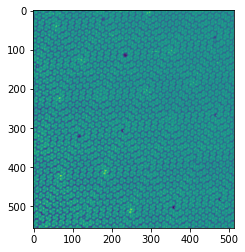

In [7]:
plt.imshow(im1)

In [8]:
import nanonispy as nap

In [9]:
%cd ../Hellerstedt\ APT

[WinError 3] The system cannot find the path specified: '../Hellerstedt\\ APT'
C:\Users\Admin\Desktop\ADS2001\molecules


In [10]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  02:56    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11        16,782,087 Helicene_Ag(111)021.sxm
              13 File(s)    201,775,049 bytes
               2 Di

In [11]:
import pickle
d = pickle.load(open('111_test_data.p','rb'))
im2 =  d['image']
im2

array([[-9.9310483e-08, -9.9313674e-08, -9.9313510e-08, ...,
        -9.9274232e-08, -9.9272683e-08, -9.9272064e-08],
       [-9.9303833e-08, -9.9305879e-08, -9.9306320e-08, ...,
        -9.9268419e-08, -9.9268171e-08, -9.9266828e-08],
       [-9.9298333e-08, -9.9299484e-08, -9.9300905e-08, ...,
        -9.9265563e-08, -9.9263829e-08, -9.9261911e-08],
       ...,
       [-9.8812613e-08, -9.8812919e-08, -9.8812848e-08, ...,
        -9.8790260e-08, -9.8791340e-08, -9.8791276e-08],
       [-9.8813210e-08, -9.8815157e-08, -9.8816137e-08, ...,
        -9.8791460e-08, -9.8791261e-08, -9.8791133e-08],
       [-9.8812947e-08, -9.8814290e-08, -9.8814787e-08, ...,
        -9.8790736e-08, -9.8790110e-08, -9.8789776e-08]], dtype=float32)

In [12]:
rescale = d['rescale']

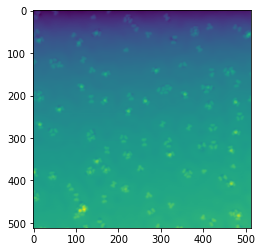

In [13]:
plt.imshow(im2)

#### Analysing im3

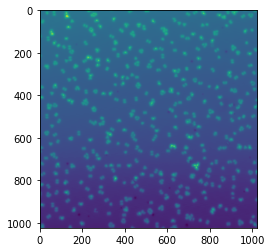

In [14]:
scan = nap.read.Scan('Ag111_APT_007.sxm')

im3 = scan.signals['Z']['forward']

if scan.header['scan_dir'] == 'down':
    im3 = np.flipud(im3)

im3[np.isnan(im3)] = np.mean(im3[~np.isnan(im3)])

plt.imshow(im3)

In [15]:
im3.shape

(1024, 1024)

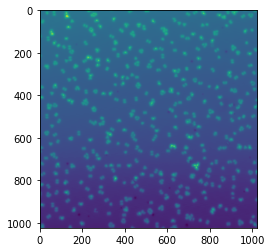

In [16]:
image= plt.imshow(im3)
image
# what image is this?


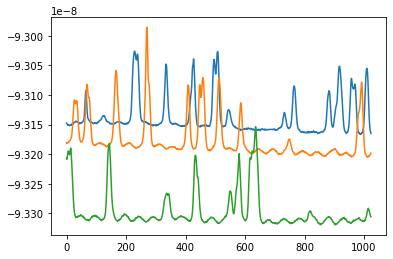

In [17]:
plt.plot(im3[:][0])
plt.plot(im3[:][256])
plt.plot(im3[:][-1])

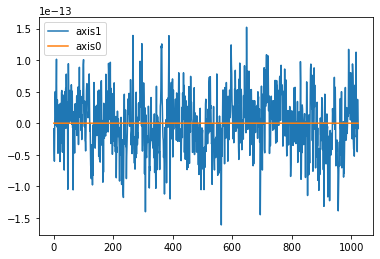

In [18]:
imslice = im3
ind1 = np.arange(imslice.shape[0])
ind2 = np.arange(imslice.shape[1])
xm = np.mean(imslice,axis=0)
for ix in ind1:
    imslice[ix,:] = imslice[ix,:]-xm
ym = np.mean(imslice,axis=1)
for iy in ind2:
    imslice[:,iy] = imslice[:,iy]-ym
    
ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(ind2,xm,label='axis1')
plt.plot(ind1,ym,label='axis0')
plt.legend()

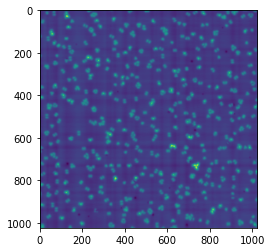

In [19]:
plt.imshow(imslice)

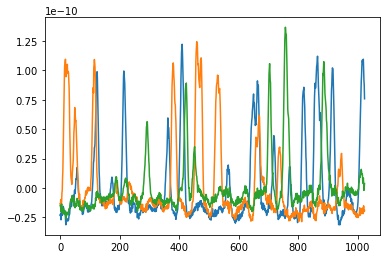

In [20]:
plt.plot(im3[:,0])
plt.plot(im3[:,256])
plt.plot(im3[:,-1])

-2.8455013e-21


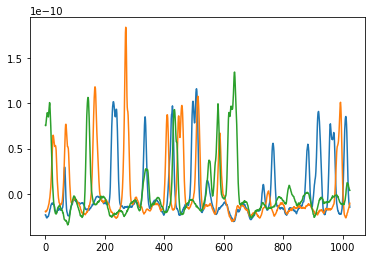

In [21]:
plt.plot(imslice[0,:])
plt.plot(imslice[256,:])
plt.plot(imslice[-1,:])
print(imslice.mean())

In [22]:
from skimage import segmentation
from skimage import filters

mask = imslice > filters.threshold_otsu(imslice)
# mask = imslice > imslice.mean()
clean_border = segmentation.clear_border(mask)
imslice_edges = segmentation.mark_boundaries(imslice, clean_border.astype(np.int))

<ipython-input-22-2cbfc2fb9b01>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imslice_edges = segmentation.mark_boundaries(imslice, clean_border.astype(np.int))


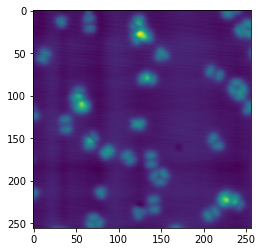

In [23]:
plt.imshow(imslice[0:256,0:256])

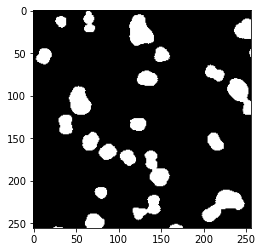

In [24]:
plt.imshow(clean_border[0:256,0:256], cmap='gray')

0.1120443344116211


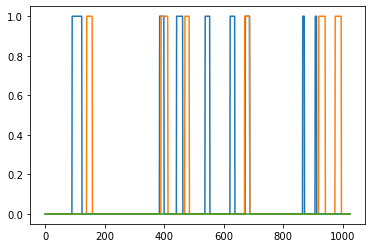

In [25]:
plt.plot(clean_border[:,52])
plt.plot(clean_border[200,:])
plt.plot(clean_border[-1,:])
print(clean_border.mean())

In [26]:
from skimage import measure

blobs_labels = measure.label(clean_border, background=0)

In [27]:
np.unique(blobs_labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

C:\Users\Admin\anaconda3\lib\site-packages\skimage\color\colorlabel.py:113: UserWarning: Negative intensities in `image` are not supported
  return _label2rgb_overlay(label, image, colors, alpha, bg_label,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


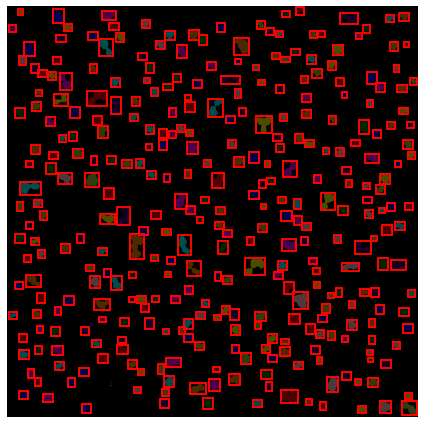

In [28]:
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


# apply threshold
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=imslice, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 50:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

# J,check here!

In [29]:
sample_rp=regionprops(label_image)
print('How many Blobs detected?:', len(sample_rp))

How many Blobs detected?: 333


In [30]:
# calculating the properties. 
import pandas as pd
props = measure.regionprops_table(label_image, properties=('area', 'perimeter','minor_axis_length','major_axis_length','eccentricity','solidity'))
improps = pd.DataFrame(props)
improps

,area,perimeter,minor_axis_length,major_axis_length,eccentricity,solidity
0,217,61.698485,12.768303,23.477618,0.839182,0.864542
1,762,111.497475,27.059520,38.250875,0.706791,0.913669
2,137,42.384776,12.512393,14.074245,0.457854,0.938356
3,601,93.254834,22.973267,33.482891,0.727489,0.953968
4,207,55.112698,12.934241,20.842124,0.784142,0.924107
...,...,...,...,...,...,...
328,592,92.669048,26.700013,29.210475,0.405588,0.954839
329,657,120.911688,19.164083,47.552943,0.915198,0.841229
330,271,60.870058,15.959507,21.790918,0.680883,0.957597
331,371,70.526912,19.931968,23.855546,0.549448,0.961140


<AxesSubplot:xlabel='area', ylabel='perimeter'>

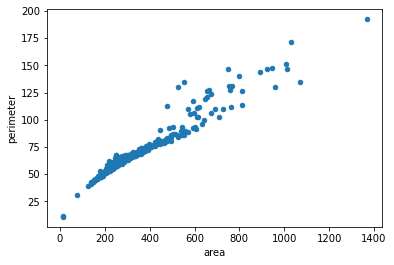

In [31]:
improps.plot.scatter(x='area', y='perimeter')

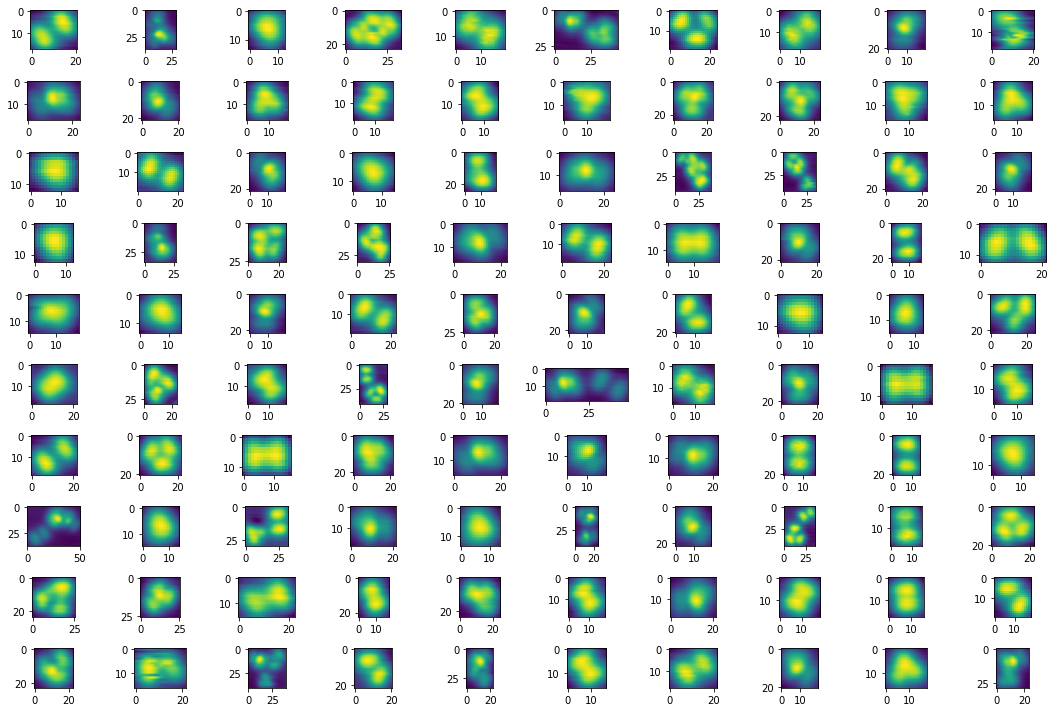

In [32]:
fig, ax = plt.subplots(10, 10, figsize=(15,10))

j = 0
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1 and j < 100:
        i = j//10 # integer division, rounded down to nearest integer
        k = j%10 # calculate remainder of k//2

        minr, minc, maxr, maxc = region.bbox
        ax[i,k].imshow(imslice[minr:maxr,minc:maxc])
        j = j+1

fig.tight_layout()

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm

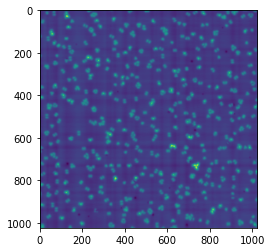

In [34]:
im3
plt.imshow(im3)

<ipython-input-35-f492126b9c62>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(imslice[0:256,0:256])


array([[-2.33479625e-11, -2.33195407e-11, -2.48756293e-11, ...,
        -1.28035083e-11, -1.39972200e-11, -1.32298339e-11],
       [-2.21170304e-11, -2.28488894e-11, -2.30194197e-11, ...,
        -1.33702494e-11, -1.34839362e-11, -1.35976230e-11],
       [-2.40355930e-11, -2.37087433e-11, -2.47035031e-11, ...,
        -1.02155367e-11, -9.52631030e-12, -9.46236145e-12],
       ...,
       [-2.07711764e-11, -2.06788059e-11, -2.10411827e-11, ...,
        -1.27775707e-11, -1.17899163e-11, -9.92829430e-12],
       [-1.62964919e-11, -1.65522873e-11, -1.70212455e-11, ...,
        -1.52022561e-11, -1.39943335e-11, -1.30137845e-11],
       [-1.67987221e-11, -1.65926647e-11, -1.62587097e-11, ...,
        -1.22370378e-11, -1.13204376e-11, -1.06383166e-11]], dtype=float32)

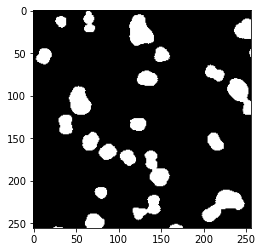

In [35]:
image= rgb2gray(imslice[0:256,0:256])
image_gray1= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))
image
# this is binarizing the image :) 

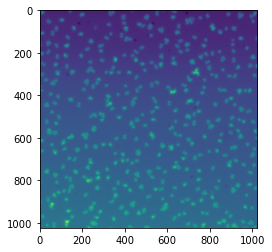

In [36]:
# lol what is this?
scan = nap.read.Scan('Ag111_APT_007.sxm')
im2 = scan.signals['Z']['forward']
if scan.header['scan_dir'] == 'down':
    im = np.flipud(im2)
im2[np.isnan(im2)] = np.mean(im2[~np.isnan(im2)])
plt.imshow(im2)

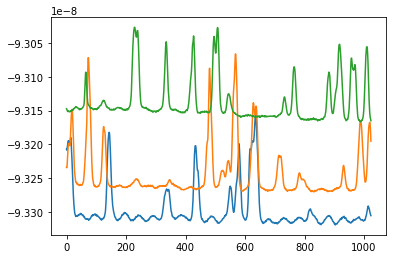

In [37]:
# show how the mean changes over differrent slices
plt.plot(im2[:][0])
plt.plot(im2[:][256])
plt.plot(im2[:][-1])

In [38]:
def image_mean_remove(image):
    '''removes the mean change in the field'''
    imslice = image
    ind1 = np.arange(imslice.shape[0])
    ind2 = np.arange(imslice.shape[1])
    xm = np.mean(imslice,axis=0)
    for ix in ind1:
        imslice[ix,:] = imslice[ix,:]-xm
    ym = np.mean(imslice,axis=1)
    for iy in ind2:
        imslice[:,iy] = imslice[:,iy]-ym
    return imslice

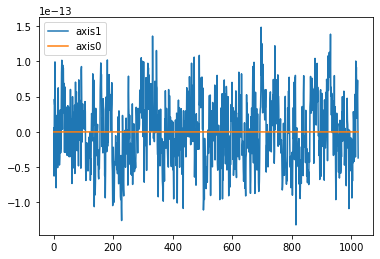

In [39]:
# remove the mean change from the image
imslice = image_mean_remove(im2)

ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(np.arange(imslice.shape[1]),xm,label='axis1')
plt.plot(np.arange(imslice.shape[0]),ym,label='axis0')
plt.legend()

# whats happenign here?

###### Blob detection and binarization


In [40]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb

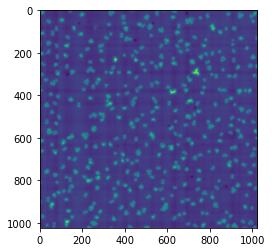

In [41]:
plt.imshow(imslice)

<ipython-input-42-b1a61ae10dd3>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  ix= rgb2gray(imslice[0:256,0:256])


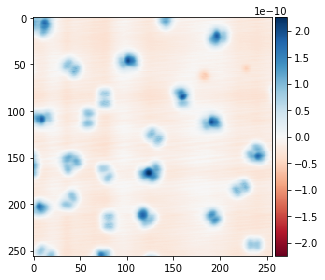

In [42]:
ix= rgb2gray(imslice[0:256,0:256])
imshow(ix)
ix_bw = ix<0.8
# imshow(ix_bw)

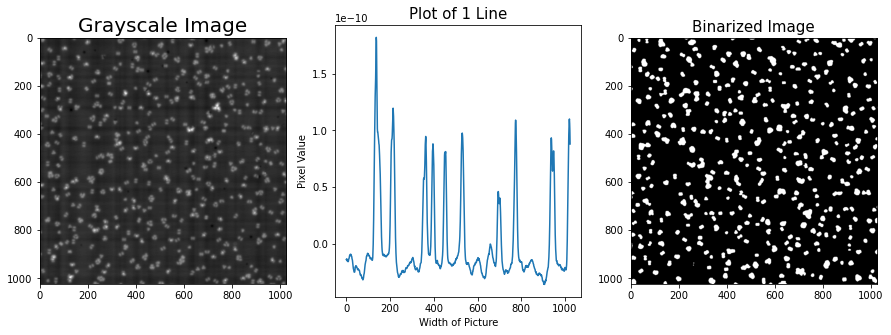

In [43]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = imslice > 0.6
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(imslice,cmap='gray')
ax[1].plot(imslice[600])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(bw,cmap='gray')

<ipython-input-44-37a7dfd55839>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(imslice[0:256,0:256])


NameError: name 'x' is not defined

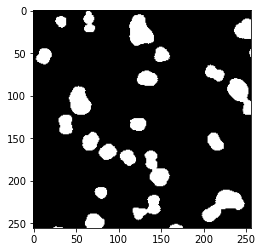

In [44]:
image= rgb2gray(imslice[0:256,0:256])
fig, ax = plt.subplots()
image_gray1= ax.imshow(clean_border[0:256,0:256], cmap='gray')
ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))

# image

In [ ]:
# fig, ax = plt.subplots(1,2,figsize=(10,5))
# ax[0].set_title('Binarized Image',fontsize=15)
# ax[0].imshow(imslice,cmap='gray')
# blobs = blob_log(bw, max_sigma=30, threshold=0.01)
# ax[1].imshow(bw, cmap='gray')
# for blob in blobs:
#     y, x, area = blob
#     ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))
# ax[1].set_title('Using LOG',fontsize=15)
# plt.tight_layout()
# plt.show()

### Blob detection (DOH,LOG AND THE OTHER ONE)

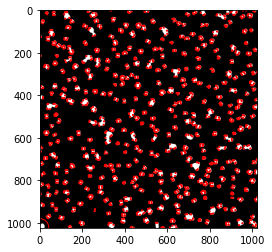

In [53]:
# laplacian of the gaussian
# Using the functions imported above, we can adjust the blob detection using the parameters max_sigma,num_sigma and threshold.
blobs = blob_log(bw, max_sigma=30, min_sigma =2, num_sigma=2, threshold=0.3, overlap = 0.6)
fig, ax = plt.subplots()
ax.imshow(bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))
# write on what it identifies....
# blob detection (medium)



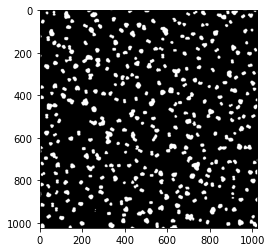

In [54]:
# the difference of the hessian
blobs = blob_doh(bw, max_sigma=30, min_sigma =2, num_sigma=2, threshold=0.3, overlap = 0.3)
fig, ax = plt.subplots()
ax.imshow(bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))

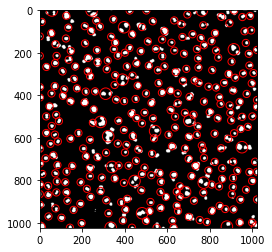

In [55]:
# the difference of the gausssian
blobs = blob_dog(bw, max_sigma=30, min_sigma =12, threshold=0.3, overlap = 0.3)
fig, ax = plt.subplots()
ax.imshow(bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))

#     THE difference of the gaussian works abit better than the laplacian of gaussian

## J please debug this code,  trying to count the blobs

In [ ]:
# sample_c = im_cleaned = multi_ero(multi_dil(sample_b,5),5)

In [ ]:
sample_l = label(sample_c)

In [ ]:
# sample_rp=regionprops(sample_l)
# print('How many Blobs detected?:', len(sample_rp))

#### this code is supposed to get the biggest blobs.
https://towardsdatascience.com/image-processing-blob-detection-204dc6428dd

In [ ]:
list1 = []
for x in sample_rp:
    list1.append(x.area)
list2  = sorted(list(enumerate(list1)),key=lambda x: x[1], reverse=True)[:7]
fig, ax = plt.subplots(1,4,figsize=(15,10))
ax[0].imshow(sample_l)
ax[0].set_title('Labelled Image',fontsize=15)
for x,y in enumerate(list2[:3]):
    ax[x+1].imshow(sample_rp[y[0]].image)
    ax[x+1].set_title('Biggest Blob'+str(x+1))

### Connecting components
If we want to detect objects that are irregular in shape — not circular in shape. Given this circumstance, we can detect objects

In [56]:
def multi_dil(bw,num):
    for i in range(num):
        bw = dilation(bw)
    return im
def multi_ero(bw,num):
    for i in range(num):
        bw = erosion(bw)
    return bw

C:\Users\Admin\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


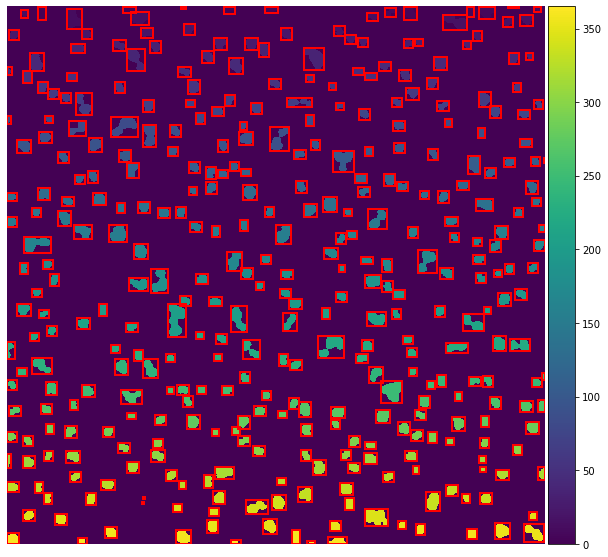

In [57]:
label_im = label(bw)
fig, ax = plt.subplots(figsize=(9, 10))
imshow(label_im)
for i in regionprops(label_im):
    minr, minc, maxr, maxc = i.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()
    
plt.show()

In [58]:
sample_rp=regionprops(label_im)
print('How many Blobs detected?:', len(sample_rp))

How many Blobs detected?: 365


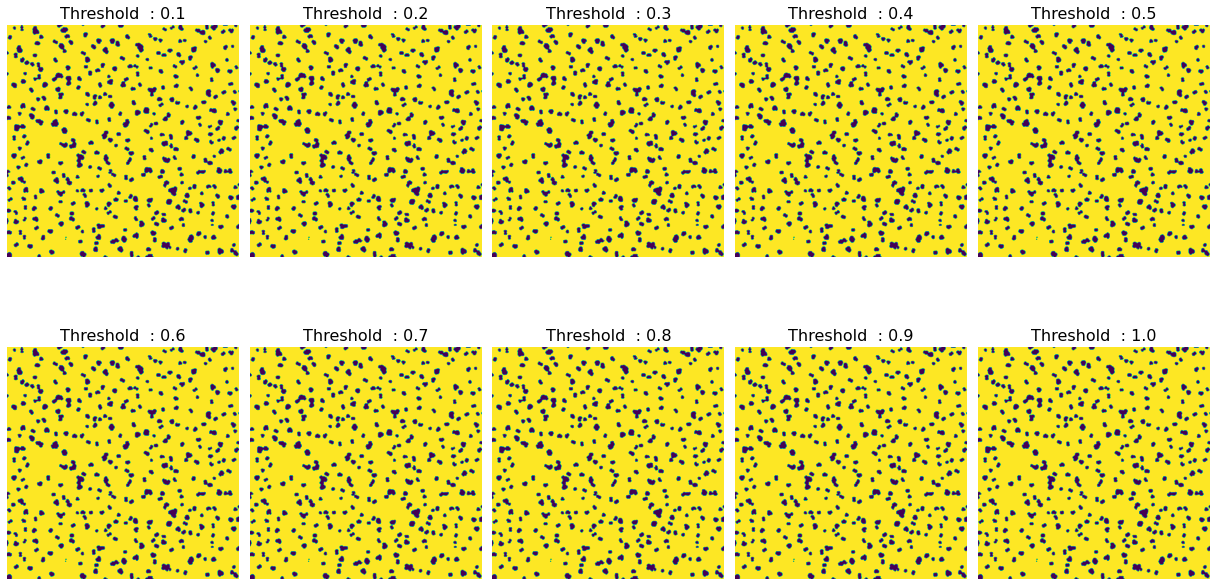

In [59]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    image_gray = bw
    fig, ax = plt.subplots(2, 5, figsize=(17, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}',      
                       fontsize = 16)
        threshold_tree = image_gray < thresholds[n]
        ax.imshow(threshold_tree);
        ax.axis('off')
    fig.tight_layout()

threshold_checker(im2)

In [ ]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    image_gray = bw
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}',      
                       fontsize = 16)
        threshold_tree = image_gray < thresholds[n]
        ax.imshow(threshold_tree);
        ax.axis('off')
    fig.tight_layout()
threshold_checker(im)

#include im2 in the code above** 

# Attempting to merge all the .sxm files so that EDA can be done  

##### This will be done using supervised learning

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
import time

In [61]:
# Reading all the .sxm files
image_path = os.path.join('*.sxm')
image_list = []
image_list
# for file in glob(image_path):
#     scan = nap.read.Scan(x)

#     im = scan.signals['Z']['forward']

#     if scan.header['scan_dir'] == 'down':
#         im = np.flipud(im)

#     im[np.isnan(im)] = np.mean(im[~np.isnan(im)])
    
#     img = nap.imread(file)
#     image_list.append(img)

[]

In [47]:
path = r"C:/Users/Admin/Desktop/ADS2001/molecules/"
%ls
# import glob

# txtfiles = []
# for file in glob.glob(path + "\\*.m4a"):
#     txtfiles.append(file)

# for item in txtfiles:
#     print(item)

 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/05/2022  12:23    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11        16,782,087 Helicene_Ag(111)021.sxm
              13 File(s)    201,775,049 bytes
               2 Di

['180509_18-16-48_SPM001.sxm', 'Ag111_APT_007.sxm', 'Ag111_APT_008.sxm', 'Ag111_APT_009.sxm', 'Ag111_APT_010.sxm', 'Ag111_APT_111.sxm', 'Ag111_APT_LL1s_UV9min_009.sxm', 'Helicene_Ag(111)008.sxm', 'Helicene_Ag(111)020.sxm', 'Helicene_Ag(111)021.sxm']


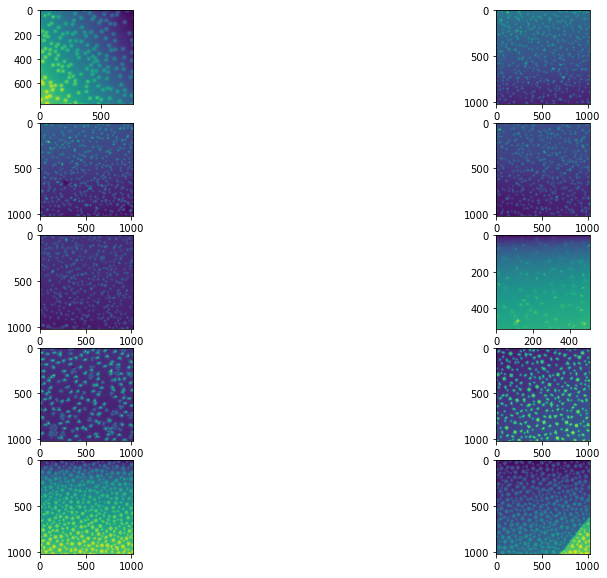

In [52]:
import glob
filepaths = glob.glob('*.sxm')
print(filepaths)
fig, axis = plt.subplots(5, 2, figsize=(15,10))
for x, ax in zip(filepaths, axis.flatten()):
    scan = nap.read.Scan(x)

    im = scan.signals['Z']['forward']

    if scan.header['scan_dir'] == 'down':
        im = np.flipud(im)

    im[np.isnan(im)] = np.mean(im[~np.isnan(im)])
    ax.imshow(im)
#     ax.set_title(x.split('\\')[1])
# print("The shape of the image is:", im.shape)

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

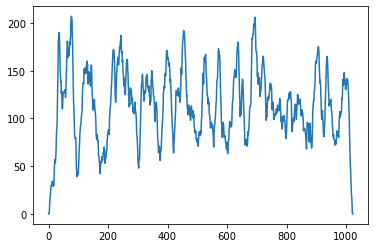

In [62]:
spots= im2
gray_spots=spots

thresh = threshold_otsu(gray_spots)
binarized = gray_spots > thresh
clean_border = segmentation.clear_border(binarized)
# clean_border.sum(axis=1)
# imshow()
plt.plot(clean_border.sum(axis=0))
# imshow(clean_border,cmap=plt.cm.gray)
binarized

In [ ]:
# closed = area_closing(binarized)
# opened = area_opening(closed)
# imshow(opened)


###### Binarizing images for blob detection pt2 

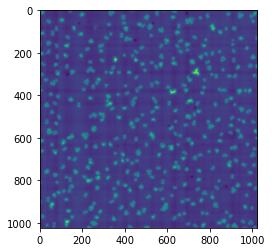

In [65]:
plt.imshow(im2)

<ipython-input-66-85afebe1c130>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(im2[0:256,0:256])


array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

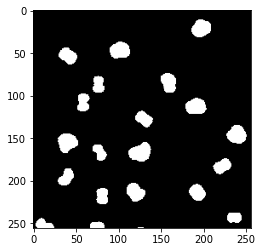

In [66]:
image= rgb2gray(im2[0:256,0:256])
image_gray1= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh = threshold_otsu(im2)
bw = closing(im2 > thresh, square(3))
bw

<ipython-input-67-8c60dec5975c>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image= rgb2gray(image[0:256,0:256])


array([[ 7.5771084e-11,  7.5216861e-11,  7.7945345e-11, ...,
        -1.8894525e-11, -1.9136109e-11, -1.9555330e-11],
       [ 8.7466208e-11,  8.7451997e-11,  8.9413095e-11, ...,
        -2.0742345e-11, -2.0138384e-11, -1.9697848e-11],
       [ 9.1540296e-11,  9.0559747e-11,  8.9429984e-11, ...,
        -2.3205250e-11, -2.2494707e-11, -2.0718351e-11],
       ...,
       [ 1.5542505e-11,  1.5578032e-11,  2.6207751e-11, ...,
        -2.5498444e-11, -2.6521625e-11, -2.6251619e-11],
       [ 1.1253103e-11,  9.8178063e-12,  1.9779615e-11, ...,
        -2.6235132e-11, -2.7393317e-11, -2.6633036e-11],
       [ 4.1509157e-12,  3.2058939e-12,  1.0375270e-11, ...,
        -2.3936839e-11, -2.4135791e-11, -2.3666832e-11]], dtype=float32)

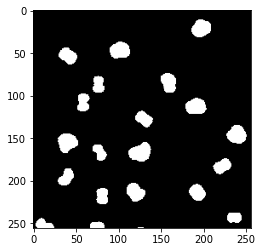

In [67]:
image= rgb2gray(image[0:256,0:256])
image_gray1= plt.imshow(clean_border[0:256,0:256], cmap='gray')
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))
image

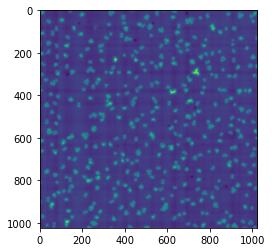

In [64]:
plt.imshow(im2)

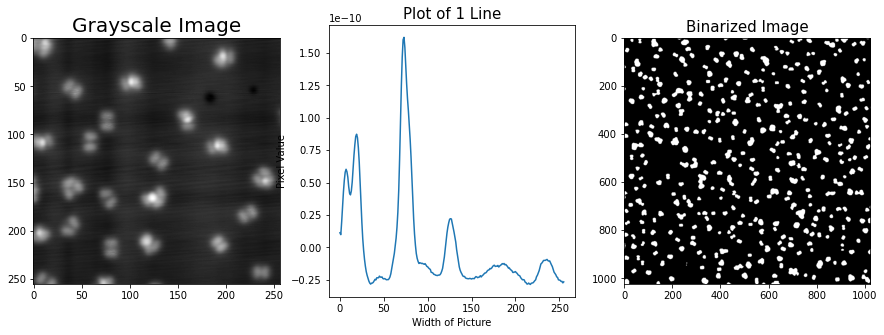

In [63]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sample_b = image > 0.2
ax[0].set_title('Grayscale Image',fontsize=20)
ax[0].imshow(image,cmap='gray')
ax[1].plot(image[254])
ax[1].set_ylabel('Pixel Value')
ax[1].set_xlabel('Width of Picture')
ax[1].set_title('Plot of 1 Line',fontsize=15)
ax[2].set_title('Binarized Image',fontsize=15)
ax[2].imshow(bw,cmap='gray')

## Calculating the properties. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # import the LogisticRegression model

import warnings
warnings.filterwarnings('ignore') # suppress warnings

In [ ]:
from logitplots import plt_decision_boundaries

In [ ]:
# calculating the properties. 

props = measure.regionprops_table(label_image, properties=('area', 'perimeter','minor_axis_length','major_axis_length','eccentricity','solidity', 'euler_number'))
improps = pd.DataFrame(props)
improps.head(10)


### EDA for Kmeans clustering 

In [ ]:
# Numerical libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd
# importing ploting libraries
from matplotlib import pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
import pandas as pd

In [ ]:
improps

In [ ]:
improps.nunique(axis=0)
improps.describe()

In [ ]:
df_cleaned = improps.dropna(axis=0)
df_cleaned.shape
df_cleaned.describe()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(improps.corr(), annot=True, linewidths=.5,center=0, cbar=False,cmap="YlGnBu")
plt.show()

In [ ]:
sns.pairplot(improps)

##### Machine learning part

In [ ]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # import the LogisticRegression model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = improps.drop('perimeter', axis=1)
y = improps['perimeter']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ssscaler = StandardScaler()
X_scaled = ssscaler.fit_transform(X)

In [ ]:
# clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
# Y_pred = clf.predict(X_test)
# print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
RF = RandomForestClassifier(max_depth=15,n_estimators=500) 
RF.fit(X_train,y_train)

In [ ]:
acc_train = RF.score(X_train,y_train)
acc_test = RF.score(X_test,y_test)
print('Train Accuracy at ',acc_train)
print('Test Accuracy at ',acc_test)

In [ ]:
# the codes above worked the firstime then stopped, I'm not sure why...
